# Machine Learning - Assignment 1
## by Anton Wiehe & Angelie Kraft

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time
import random


def generate_data():
    x = np.random.random(100)
    epsilon = np.random.uniform(-0.3, 0.3, 100)
    y = np.sin(2 * np.pi * x) + epsilon
    return x, y


In [14]:
# Generate polynomial
def poly_model(x, thetas):
    return np.array([np.sum(summands(x[i],thetas.size) * thetas) for i in range(x.size)])

def summands(x_i, size):
    return np.array([x_i ** i for i in range(size)])

# Calc derivative of polynomial
def poly_model_deriv(x, thetas):
    return np.array([np.array([x[j] ** i 
                               for i in range(thetas.size)]) 
                     for j in range(x.size)])


In [15]:
# Generate thetas
def generate_thetas(number_of_thetas):
    return np.random.uniform(-0.5, 0.5, number_of_thetas)

In [16]:
# Shuffle two lists in same order
def shuffle(a,b):
    assert len(a) == len(b)
    start_state = random.getstate()
    random.shuffle(a)
    random.setstate(start_state)
    random.shuffle(b)

In [17]:
# Calc derivative of mean squared error
def mse_deriv(x, y):
    return np.mean(-2 * (x - y), axis=0)

# Calc mean squared error = loss function
def mse(x, y):
    return np.mean((x - y) ** 2)

## Stochastic Gradient Descent

In [18]:
def sgd(inputs, targets, thetas, epochs=100, lr=0.1, batch_size=1):
    print("learning rate:", lr)
    
    # initialize plot
    fig = plt.figure(1)
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    plt.ion()
    fig.tight_layout()
    fig.show()
    fig.canvas.draw()
    
    errors = []
    
    for epoch in range(epochs):
        shuffle(targets,inputs)
        
        error = 0
        for batch_idx in range(len(inputs) // batch_size):
            batch_inputs = inputs[batch_idx * batch_size:batch_idx * batch_size + batch_size]
            batch_targets = targets[batch_idx * batch_size:batch_idx * batch_size + batch_size]
            batch_predictions = poly_model(batch_inputs, thetas)
            error = mse(batch_targets, batch_predictions)
            errors.append(error)
            gradient = mse_deriv(batch_targets, batch_predictions)
            *poly_model_deriv(batch_inputs, thetas)
            mean_gradient = np.mean(gradient, axis=0)
            thetas = thetas - lr * mean_gradient 
        
     
        # update plot
        ax1.clear()
        ideal_x = np.arange(0,1,0.001) 
        ax1.scatter(x,y, label="data") 
        ax1.plot(ideal_x, np.sin(2 * np.pi * ideal_x))
        ax1.plot(ideal_x, poly_model(ideal_x, thetas), label="trained output")
        ax1.set_label("Epoch: " + str(epoch))
        ax1.legend()
        ax1.set(xlabel="X",ylabel="Y")
        
        fig.canvas.draw()
        
        ax2.clear()
        errors_smoothed = running_average_cumsum(errors, window=1000)
        ax2.plot(errors_smoothed)
        ax2.set_label("MSE training during training")
        ax2.set(xlabel="Training Steps",ylabel="MSE")
        fig.canvas.draw()
        time.sleep(0.0001)
        
        
            
    print("Final thetas: ", thetas)
    #fig.canvas.draw()
    return thetas, errors

In [19]:
# smoothing
def running_average_cumsum(seq, window=100):
    s = np.insert(np.cumsum(seq), 0, [0])
    return (s[window :] - s[:-window]) * (1. / window)

learning rate: 0.1


<IPython.core.display.Javascript object>


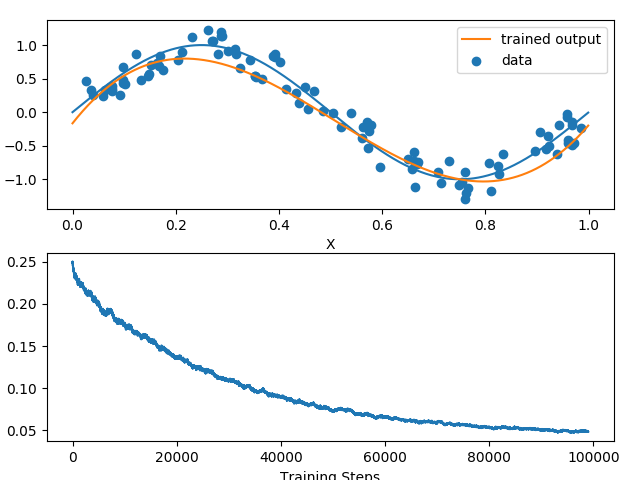

Final thetas:  [ -0.16601995   9.77841302 -28.67071457  18.86733618]


In [22]:
x, y = generate_data()
thetas = generate_thetas(4)

epochs = 1000
trained_thetas, errors = sgd(x, y, thetas, epochs=epochs, lr=0.1, batch_size=1)
# Batch size = 1 for Stochastic Gradient Descent

In [21]:
print("Final error: " , errors[-1])

Final error:  0.03695157824140702
